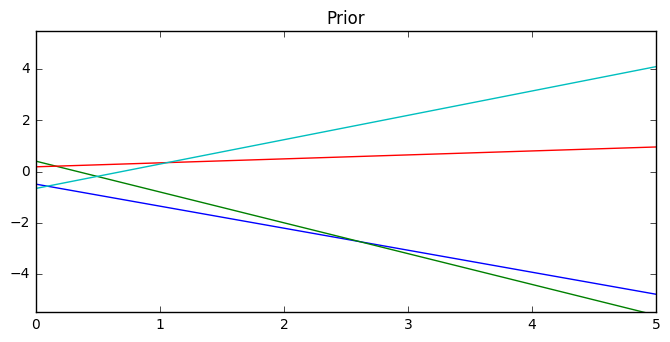

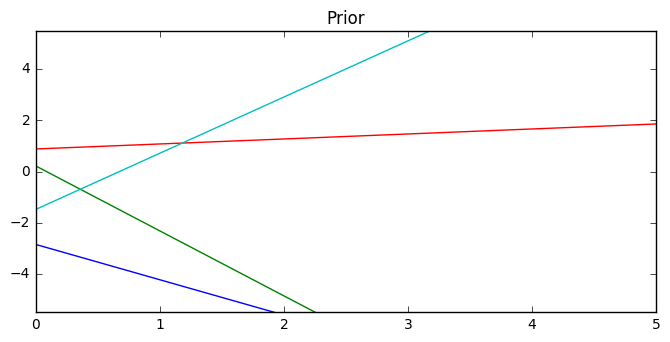

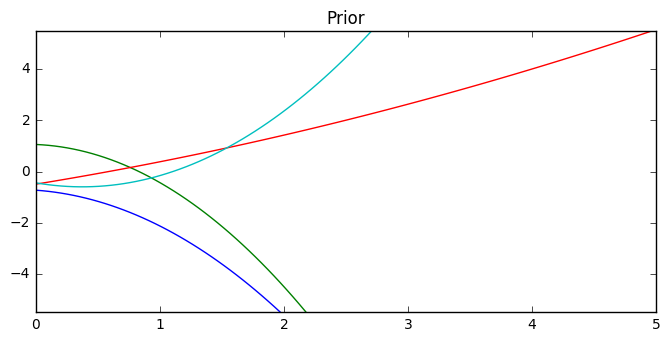

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [0.3*DotProduct(sigma_0=1.0),
           1.2*DotProduct(sigma_0=2.0),
           0.4*DotProduct(sigma_0=1.0)**2
           ]

for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    #plt.plot(X_, y_mean, 'k', lw=3, zorder=9)  #dibuixa linia negra a la mitjana 0
    #plt.fill_between(X_, y_mean - y_std, y_mean + y_std,  #treiem la zona ombrejada corresponent a la desviacio std.
    #                 alpha=0.5, color='g')
    y_samples = gp.sample_y(X_[:, np.newaxis], 4)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-5.5, 5.5)
    plt.title("Prior", fontsize=12)
plt.show()